# Prueba 2 Minería de datos

## Profesor Daniel Montero

## Integrantes

- ### Francisco Galdames
- ### Jorge Parra
- ### Gabriel Soto

Fecha de entrega: Viernes 24\-05\-24



In [28]:
import pandas

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
import numpy

import matplotlib.pyplot as pyplot

pandas.options.mode.chained_assignment = None


In [29]:
# Importamos csv
df = pandas.read_csv("./weatherAUS.csv")
df.head(250)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2009-08-04,Albury,3.2,14.7,0.0,NaN,NaN,SSE,17.0,NaN,...,53.0,1021.7,1018.9,1.0,NaN,5.7,14.0,No,5.4,Yes
246,2009-08-05,Albury,5.7,13.8,5.4,NaN,NaN,NNE,19.0,ENE,...,76.0,1022.2,1020.2,8.0,8.0,8.9,13.6,Yes,0.4,No
247,2009-08-06,Albury,5.1,17.1,0.4,NaN,NaN,N,35.0,NaN,...,58.0,1021.9,1016.7,7.0,NaN,8.0,16.6,No,0.8,No
248,2009-08-07,Albury,8.0,13.9,0.8,NaN,NaN,WNW,57.0,WNW,...,47.0,1012.8,1015.6,8.0,8.0,9.8,13.7,No,4.2,Yes


In [30]:
# Estadisticas descriptivas del dataset
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [31]:
# Obtenemos el porcentaje de valores faltantes por cada columna
round(df.isna().sum() / len(df))

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RISK_MM          0.0
RainTomorrow     0.0
dtype: float64

In [32]:
# Limpieza de nulos

## fordward fill por columna de Location 
dffordwardfill = df.groupby("Location").ffill()

## Se reinserta la columna
dffordwardfill['Location'] = df['Location']

## Se reorganizan las columnas
dffordwardfill = dffordwardfill.reindex(
    columns=[
        'Date',
        'Location',
        'MinTemp', 
        'MaxTemp',
        'Rainfall',
        'WindGustDir',
        'WindGustSpeed',
        'WindDir9am',
        'WindDir3pm',
        'WindSpeed9am',
        'WindSpeed3pm',
        'Humidity9am',
        'Humidity3pm',
        'Temp9am',
        'Temp3pm',
        'RainToday',
        'RISK_MM',
        'RainTomorrow'
    ])

## Dropeo de columnas ue quedaron con valores nulos
dfNoNulos = dffordwardfill.dropna()

### No se requere una limpieza de la columna "Locations" ni de "WindGustDir", ya que en la prueba anterior se valido que no existen  typos o errores de escritura.

## Muestra de columnas
dfNoNulos.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [33]:
# Dropeo y transformacion de columnas
# Transformamos columna Date a Month
dfNoNulos['Date'] = pandas.to_datetime(dfNoNulos['Date'])
dfNoNulos.insert(0, 'Month', dfNoNulos["Date"].dt.month)

columnas_a_eliminar = [
    "Date",
    "RISK_MM"
]

dfNoNulos = dfNoNulos.drop(columnas_a_eliminar, axis=1)

# Transformamos columnas categoricas a numericas
columnasACategorizar = [
    "Location",
    "WindGustDir",
    "WindDir9am",
    "WindDir3pm",
    "RainToday",
    "RainTomorrow"
]
labelencoder = LabelEncoder()

for columna in columnasACategorizar:
    dfNoNulos[columna] = labelencoder.fit_transform(dfNoNulos[columna])


In [34]:
dfNoNulos

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,16.9,21.8,0,0
1,12,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,17.2,24.3,0,0
2,12,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,21.0,23.2,0,0
3,12,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,18.1,26.5,0,0
4,12,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,6,39,3.5,21.8,0.0,0,31.0,2,0,15.0,13.0,59.0,27.0,9.4,20.9,0,0
142189,6,39,2.8,23.4,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,10.1,22.4,0,0
142190,6,39,3.6,25.3,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,10.9,24.5,0,0
142191,6,39,5.4,26.9,0.0,3,37.0,9,14,9.0,9.0,53.0,24.0,12.5,26.1,0,0


In [35]:
# Cantidad de datos por Locacion
dfNoNulos['Location'].value_counts()

Location
8     3418
29    3192
12    3192
14    3188
6     3161
0     3090
5     3034
37    3033
2     3031
21    3030
16    3028
4     3028
1     3011
30    3009
18    3009
19    3007
36    3005
26    3002
33    3000
42    2999
38    2998
31    2996
46    2990
9     2988
7     2988
45    2982
13    2980
40    2976
28    2964
25    2964
34    2955
10    2953
44    2952
11    2941
32    2932
24    2929
3     2927
20    2854
41    2819
22    2764
27    2762
43    2553
17    2435
35    2359
23    1569
15    1559
39    1521
Name: count, dtype: int64

# Modelos

## Test Train

In [36]:
df_testtrain = dfNoNulos.copy()
X = df_testtrain.drop(columns=['RainTomorrow'])
y = df_testtrain['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print("Tamaño entrenamiento:", X_train.shape[0])
print("Tamaño prueba:", X_test.shape[0])

Tamaño entrenamiento: 101307
Tamaño prueba: 33770


## Regresión logística

In [37]:
regresion_logistica = LogisticRegression(random_state=42, max_iter=500)
regresion_logistica.fit(X_train, y_train)
y_prediccion = regresion_logistica.predict(X_test)
y_prediccion


array([0, 0, 0, ..., 0, 1, 0])

### Evaluaciones 

Matriz de Confusión
-----------------------------------------------------


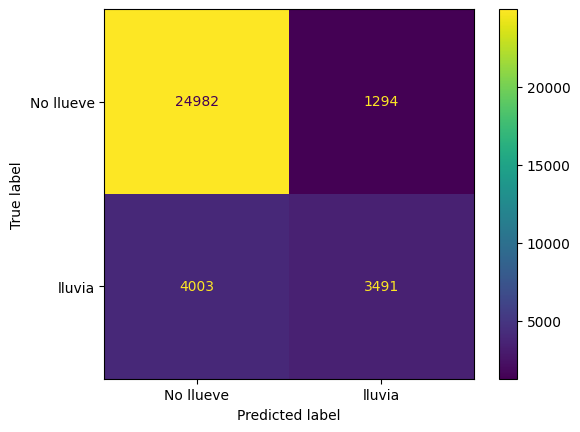

Reporte de Clasificación
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     26276
           1       0.73      0.47      0.57      7494

    accuracy                           0.84     33770
   macro avg       0.80      0.71      0.74     33770
weighted avg       0.83      0.84      0.83     33770



Curva ROC
-----------------------------------------------------


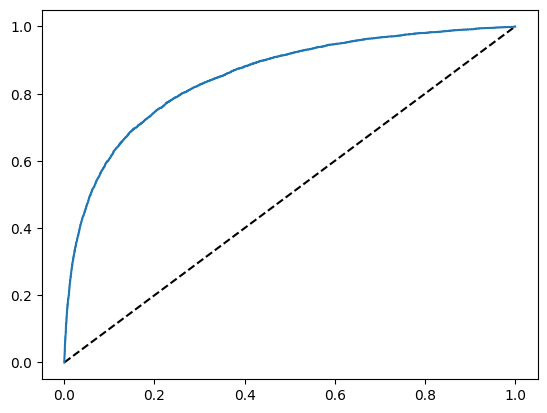

In [38]:
# Matriz de confusion
matriz_confusion = confusion_matrix(y_test, y_prediccion)
print('Matriz de Confusión') 
print('-'*53)

# Graficamos la matriz de confusion
grafico_matriz_confusion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion , display_labels = ['No llueve', 'lluvia'])
grafico_matriz_confusion.plot()
pyplot.show()
reporte_clasificacion = classification_report(y_test , y_prediccion)
print('Reporte de Clasificación') 
print('-'*53)
print(reporte_clasificacion)
print('\n')

# Curva Roc
print('Curva ROC') 
print('-'*53)
y_probabilidad_estimada = regresion_logistica.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probabilidad_estimada)
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.show()

### Precisión del modelo

In [39]:
# Puntaje curva
print("Puntaje Curva ROC:", round(roc_auc_score(y_test, y_probabilidad_estimada), 5))

# Puntaje entrenamiento
print("Puntaje Entrenamiento:", round(regresion_logistica.score(X_train, y_train), 5))
print("Puntaje Prueba:", round(regresion_logistica.score(X_test, y_test), 5))

Puntaje Curva ROC: 0.85085
Puntaje Entrenamiento: 0.83962
Puntaje Prueba: 0.84314


## Árbol de decisión

In [40]:
columnsarbol_decision = DecisionTreeClassifier(max_depth=10, criterion='entropy',random_state=42)
arbol_decision.fit(X_train, y_train)
y_prediccion_tree = arbol_decision.predict(X_test)
y_prediccion_tree

array([0, 0, 0, ..., 1, 0, 0])

[Text(0.5, 0.875, 'Humidity3pm <= 66.5\nentropy = 0.763\nsamples = 101307\nvalue = [78837, 22470]\nclass = Llueve'),
 Text(0.25, 0.625, 'WindGustSpeed <= 49.0\nentropy = 0.545\nsamples = 78027\nvalue = [68235, 9792]\nclass = Llueve'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Humidity3pm <= 51.5\nentropy = 0.448\nsamples = 62096\nvalue = [56300, 5796]\nclass = Llueve'),
 Text(0.0625, 0.125, 'entropy = 0.315\nsamples = 40124\nvalue = [37844, 2280]\nclass = Llueve'),
 Text(0.1875, 0.125, 'entropy = 0.634\nsamples = 21972\nvalue = [18456, 3516]\nclass = Llueve'),
 Text(0.375, 0.375, 'Humidity3pm <= 44.5\nentropy = 0.813\nsamples = 15931\nvalue = [11935, 3996]\nclass = Llueve'),
 Text(0.3125, 0.125, 'entropy = 0.629\nsamples = 8796\nvalue = [7408.0, 1388.0]\nclass = Llueve'),
 Text(0.4375, 0.125, 'entropy = 0.947\nsamples = 7135\nvalue = [4527, 2608]\nclass = Llueve'),
 Text(0.75, 0.625, 'Humidity3pm <= 81.5\nentropy = 0.994\nsamples = 23280\nvalue = [10602.0, 12678.0]\nclass = No

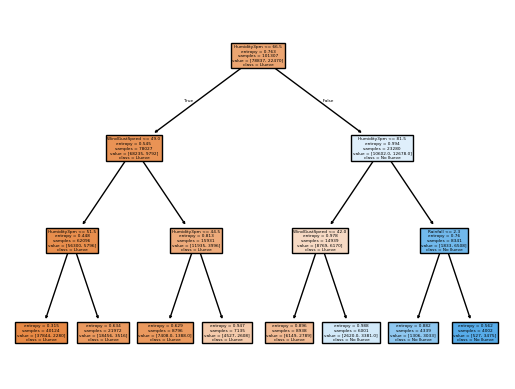

In [41]:
# plot tree
plot_tree(
    arbol_decision,
    feature_names=X.columns,
    class_names=['Llueve', 'No llueve'],
    filled=True
)

### Evaluaciones

Matriz de Confusión
-----------------------------------------------------


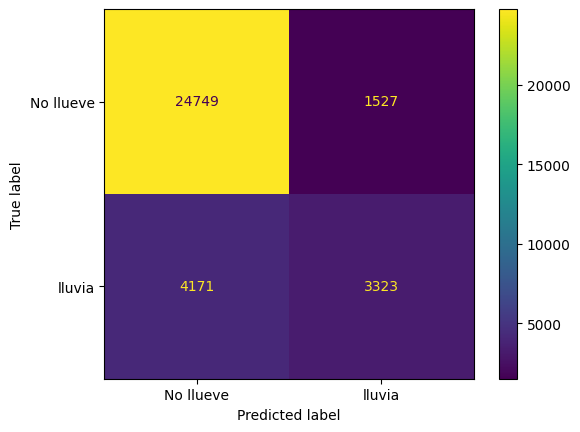

Reporte de Clasificación
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     26276
           1       0.69      0.44      0.54      7494

    accuracy                           0.83     33770
   macro avg       0.77      0.69      0.72     33770
weighted avg       0.82      0.83      0.82     33770



Curva ROC
-----------------------------------------------------


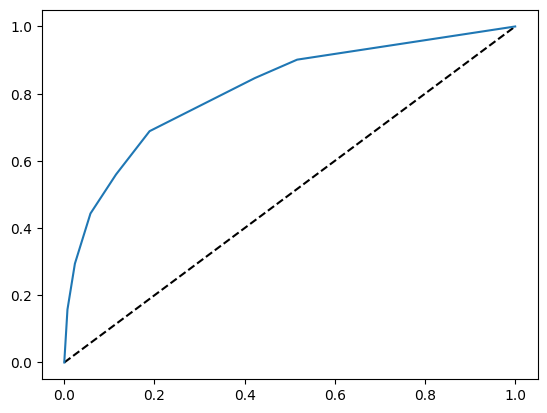

In [42]:
# Matriz de confusion
matriz_confusion = confusion_matrix(y_test, y_prediccion_tree)
print('Matriz de Confusión') 
print('-'*53)

# Graficamos la matriz de confusion
grafico_matriz_confusion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion , display_labels = ['No llueve', 'lluvia'])
grafico_matriz_confusion.plot()
pyplot.show()
reporte_clasificacion = classification_report(y_test , y_prediccion_tree)
print('Reporte de Clasificación') 
print('-'*53)
print(reporte_clasificacion)
print('\n')

# Curva Roc
print('Curva ROC') 
print('-'*53)
y_probabilidad_estimada = arbol_decision.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probabilidad_estimada)
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.show()

### Precisión del Modelo

In [43]:
# Puntaje curva
print("Puntaje Curva ROC:", round(roc_auc_score(y_test, y_probabilidad_estimada), 5))

# Puntaje entrenamiento
print("Puntaje Entrenamiento:", round(arbol_decision.score(X_train, y_train), 5))
print("Puntaje Prueba:", round(arbol_decision.score(X_test, y_test), 5))

Puntaje Curva ROC: 0.81267
Puntaje Entrenamiento: 0.83186
Puntaje Prueba: 0.83127


## Naive Bayes

In [44]:
# Ya que estamos usando datos binarios (0=No llueve,1=Lluvia)
# La mejor implementacion de naive bayes para este caso es Bernoulli

naive_bayes = BernoulliNB()
naive_bayes.fit(X_train, y_train)
y_prediccion_bayes = naive_bayes.predict(X_test)
y_prediccion_bayes

array([0, 0, 0, ..., 0, 1, 0])

### Evaluaciones

Matriz de Confusión
-----------------------------------------------------


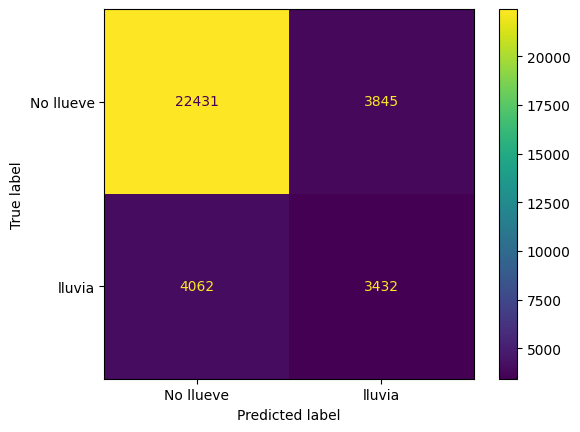

Reporte de Clasificación
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     26276
           1       0.47      0.46      0.46      7494

    accuracy                           0.77     33770
   macro avg       0.66      0.66      0.66     33770
weighted avg       0.76      0.77      0.76     33770



Curva ROC
-----------------------------------------------------


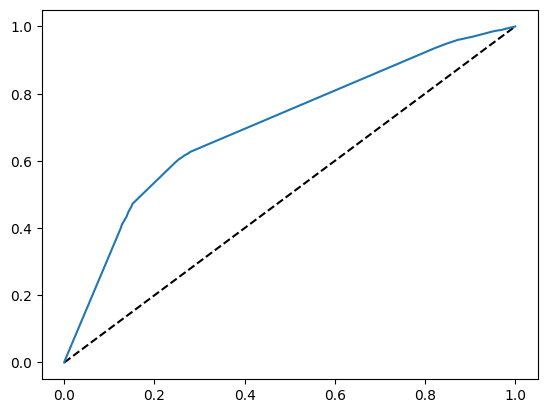

In [45]:
# Matriz de confusion
matriz_confusion = confusion_matrix(y_test, y_prediccion_bayes)
print('Matriz de Confusión') 
print('-'*53)

# Graficamos la matriz de confusion
grafico_matriz_confusion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion , display_labels = ['No llueve', 'lluvia'])
grafico_matriz_confusion.plot()
pyplot.show()
reporte_clasificacion = classification_report(y_test , y_prediccion_bayes)
print('Reporte de Clasificación') 
print('-'*53)
print(reporte_clasificacion)
print('\n')

# Curva Roc
print('Curva ROC') 
print('-'*53)
y_probabilidad_estimada = naive_bayes.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probabilidad_estimada)
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.show()

    ### Precisión del Modelo

In [46]:
# Puntaje curva
print("Puntaje Curva ROC:", round(roc_auc_score(y_test, y_probabilidad_estimada), 5))

# Puntaje entrenamiento
print("Puntaje Entrenamiento:", round(naive_bayes.score(X_train, y_train), 5))
print("Puntaje Prueba:", round(naive_bayes.score(X_test, y_test), 5))

Puntaje Curva ROC: 0.70412
Puntaje Entrenamiento: 0.76182
Puntaje Prueba: 0.76586


## Maquina de Vectores de Soporte

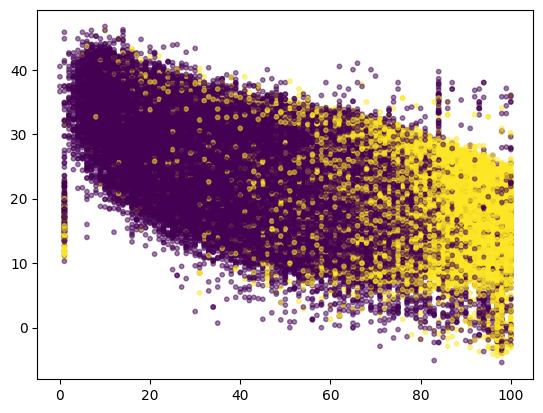

In [47]:
# Visualizacion del conjunto de datos
# Se puede observar que hay un a mayor tendencia de lluvia cuando la humeda es mayor a una temperatura media
pyplot.scatter(
    x = df_testtrain.Humidity3pm,
    y = df_testtrain.Temp3pm,
    c = df_testtrain.RainTomorrow,
    s = 10,
    alpha=0.5,
    label = "Todos"
)
pyplot.show()

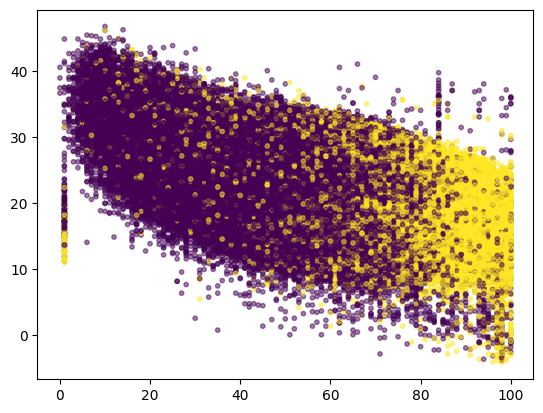

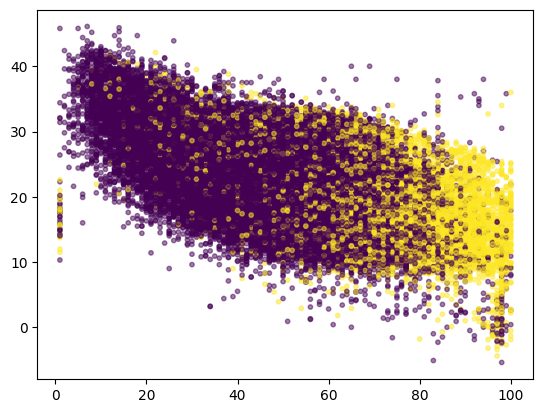

In [48]:
# Comparacion de Train contra Test
pyplot.scatter(
    x = X_train.Humidity3pm,
    y = X_train.Temp3pm,
    c = y_train,
    s = 10,
    alpha=0.5,
    label = "Train"
)
pyplot.show()

pyplot.scatter(
    x = X_test.Humidity3pm,
    y = X_test.Temp3pm,
    c = y_test,
    s = 10,
    alpha=0.5,
    label = "Test"
)
pyplot.show()

In [49]:
# LinearSVC (Support Vector Classification)

svc_linear = LinearSVC(dual="auto", random_state=42, max_iter=5000)
svc_linear.fit(X_train, y_train)

print("Coeficiente", svc_linear.coef_)
print("Intercepto", svc_linear.intercept_)

Coeficiente [[ 4.23219814e-03 -1.60650082e-03  8.46972532e-03  1.17242511e-02
   5.32792671e-03  3.12161817e-03  2.21409322e-02 -1.17767282e-02
  -1.89240220e-05 -4.96399473e-03 -1.27205007e-02 -3.83311499e-04
   2.02943321e-02 -8.44072264e-03 -2.93606401e-03  1.93416767e-01]]
Intercepto [-2.33494184]


In [50]:
svc_linear_prediccion = (svc_linear.decision_function(X_test) > 0).astype(int)
svc_linear_prediccion

array([0, 0, 0, ..., 0, 1, 0])

Matriz de Confusión
-----------------------------------------------------


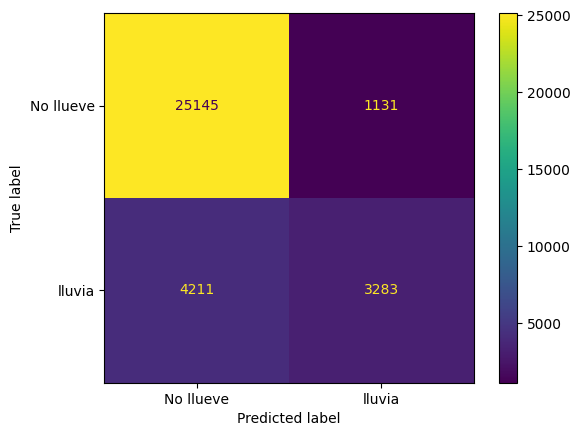

Reporte de Clasificación
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.96      0.90     26276
           1       0.74      0.44      0.55      7494

    accuracy                           0.84     33770
   macro avg       0.80      0.70      0.73     33770
weighted avg       0.83      0.84      0.83     33770





In [51]:
# Matriz de confusion
matriz_confusion = confusion_matrix(y_test, svc_linear_prediccion)
print('Matriz de Confusión') 
print('-'*53)

# Graficamos la matriz de confusion
grafico_matriz_confusion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion , display_labels = ['No llueve', 'lluvia'])
grafico_matriz_confusion.plot()
pyplot.show()
reporte_clasificacion = classification_report(y_test , svc_linear_prediccion)
print('Reporte de Clasificación') 
print('-'*53)
print(reporte_clasificacion)
print('\n')

In [52]:
def linear_function(x, m = -1 * svc_linear.coef_[0][0] / svc_linear.coef_[0][1] , c = svc_linear.intercept_[0] / svc_linear.coef_[0][1]):
    return m * x - c

In [53]:
decision_boundary_line_x = numpy.array([X_train.Humidity3pm.min(), X_train.Humidity3pm.max()])
decision_boundary_line_y = [linear_function(x) for x in decision_boundary_line_x]
decision_boundary_line_y

[-1453.4333293760262, -1189.9913148011528]

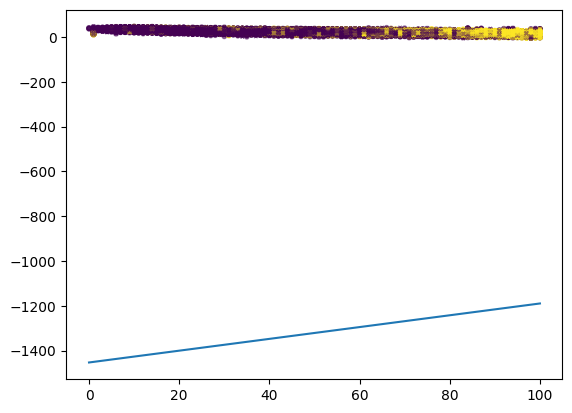

In [54]:
pyplot.scatter(
    x = X_train.Humidity3pm,
    y = X_train.Temp3pm,
    c = y_train,
    s = 10,
    alpha=0.5,
    label = "Train"
)

pyplot.scatter(
    x = X_test.Humidity3pm,
    y = X_test.Temp3pm,
    c = y_test,
    s = 8,
    alpha=0.5,
    marker="x",
    label = "Test"
)
pyplot.plot(decision_boundary_line_x, decision_boundary_line_y)
pyplot.show()

#  Conclusiones
Podemos decir que ningun modelo puede ser efectivo bajo las condiciones que hemos dado, esto puede deberse a una basta cantidad de columnas que se asignaron en cada modelo.

Sin embargo, si tenemos que decidir por cual es el mejor modelo de los 4, podemos decir que el modelo de Regresión Logística es el mejor, ya que tiene una precisión macro de 0.80, siendo este dato el mas facil de entender.